In [39]:
# Step 1: Data Preparation
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the file path and rename
old_path = r'C:\Users\HP\Downloads\netflix_data.csv'
new_path = r'C:\Users\HP\Downloads\Netflix_shows_movies.csv'


# Renaming the file
os.rename(old_path, new_path)

# Load the dataset
netflix_data = pd.read_csv(new_path)

In [51]:
netflix_data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [52]:
#Step 2 Data Cleaning
#Address missing values in the dataset.
# Fill missing values in 'director' and 'cast' with 'Unknown'
netflix_data_cleaned = netflix_data.fillna({'director': 'Unknown', 'cast': 'Unknown'})

# For now, we’ll drop rows where 'listed_in' (genre) or 'rating' is missing
netflix_data_cleaned = netflix_data_cleaned.dropna(subset=['listed_in', 'rating'])

# Confirm the missing values have been handled
print("Missing values after cleaning:")
print(netflix_data_cleaned.isnull().sum())



Missing values after cleaning:
show_id           0
type              0
title             0
director          0
cast              0
country         472
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64


In [43]:
# Step 3: Basic Data Exploration
# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(netflix_data.head())

# Check the summary of the dataset
print("\nDataset Info:")
print(netflix_data.info())

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(netflix_data.describe())

# Step 2: Check for missing values
print("\nMissing Values in Each Column:")
print(netflix_data.isnull().sum())

# Step 3: Analyze unique values in 'listed_in' (which appears to be the genre) and 'rating'
print("\nUnique genres in the 'listed_in' column:")
print(netflix_data['listed_in'].unique())

print("\nUnique ratings in the 'rating' column:")
print(netflix_data['rating'].unique())


First five rows of the dataset:
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         d

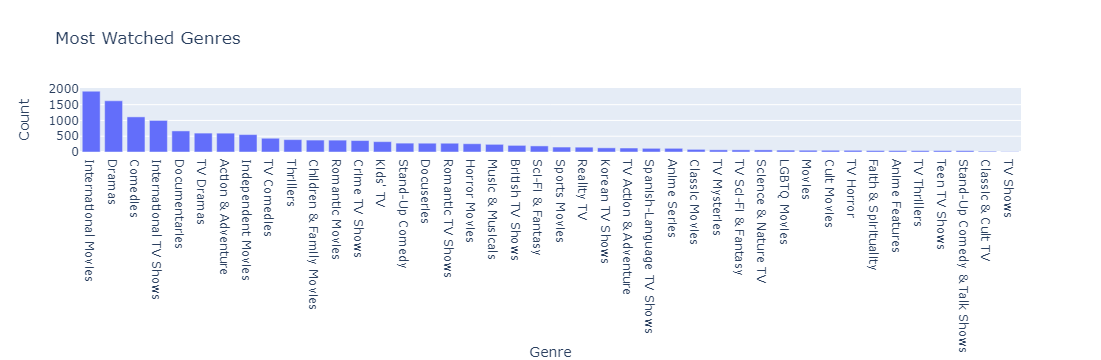

In [60]:
import plotly.express as px


# Step 4: Data Visualization

# 4.1: Visualization of Most Watched Genres (Assuming 'listed_in' contains the genres)
# Load the dataset, only keep necessary columns
netflix_data_cleaned = pd.read_csv('C:/Users/HP/Downloads/Netflix_shows_movies.csv', usecols=['listed_in'])

# Split the 'listed_in' column into multiple genres and explode to separate rows
netflix_genres_count = netflix_data_cleaned['listed_in'].str.split(', ').explode().value_counts().reset_index()

# Rename columns for clarity
netflix_genres_count.columns = ['Genre', 'Count']

# Create an interactive bar chart using Plotly
fig = px.bar(netflix_genres_count,
             x='Genre', y='Count',
             labels={'Genre':'Genre', 'Count':'Count'},
             title='Most Watched Genres')

# Update layout to order bars by count in descending order
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


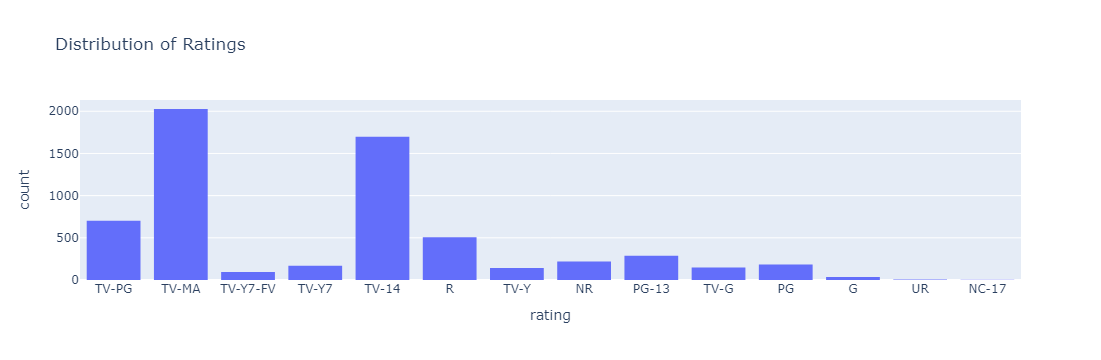

In [57]:
import plotly.express as px

# 4.2: Visualization of Ratings Distribution
# Check if 'rating' exists in the columns
print(netflix_data_cleaned.columns)

# If 'rating' exists, create an interactive histogram
if 'rating' in netflix_data_cleaned.columns:
    fig = px.histogram(netflix_data_cleaned, x="rating", title="Distribution of Ratings")
    fig.show()
else:
    print("Error: 'rating' column not found in the dataset.")


In [62]:
import shutil
from zipfile import ZipFile

# Path to the file you want to move
file_path = 'C:/Users/HP/Downloads/Netflix_shows_movies.csv'

# Directory to hold the zipped folder
zip_folder_name = 'Netflix Data Analysis'
zip_file_name = f'{zip_folder_name}.zip'

# Create a zipped folder and move the file
with ZipFile(zip_file_name, 'w') as zip_file:
    zip_file.write(file_path, os.path.basename(file_path))

# Move the zip file to the same directory as the original file
shutil.move(zip_file_name, os.path.join(os.path.dirname(file_path), zip_file_name))

print(f"File moved and zipped as '{zip_file_name}' successfully.")


File moved and zipped as 'Netflix Data Analysis.zip' successfully.
